* Cho dữ liệu champagne_new.xlsx là dữ liệu bán champagne theo thời gian từ tháng 01-1964 đến tháng 09-1972
* Yêu cầu: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán Time Series thích hợp để thực hiện việc dự đoán số tiền champagne bán được của 9 tháng tiếp theo từ tháng 10-1972 đến tháng 06-1973 giá trị dựa trên các thông tin được cung cấp
1. Thực hiện Decomposition, trực quan hóa, nhận xét.
2. Tạo dữ liệu train/test với train chiếm 75% dữ liệu, test chiếm 25% dữ liệu.
3. Áp dụng thuật toán phù hợp. 
4. Tìm kết quả.
5. Trực quan hóa kết quả (trong biểu đồ có cả train, test, predict và next_9_months) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime

from sklearn.metrics import mean_absolute_error, mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_excel("../../Data/champagne_new.xlsx", index_col= "Month", parse_dates = ['Month'])
df.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   monthly_champange  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [4]:
df.index.freq = 'MS'

In [5]:
df.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [6]:
df.tail()

,monthly_champange
Month,
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298
1972-08-01,1413
1972-09-01,5877


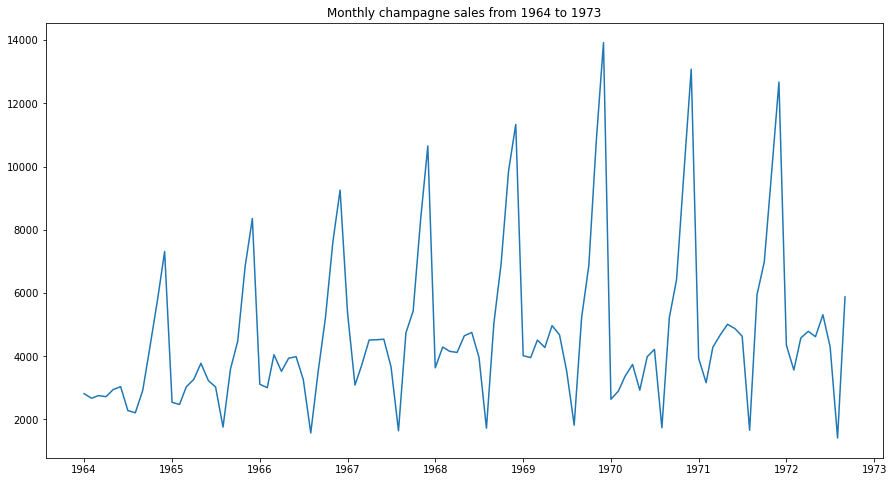

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(df)
plt.title("Monthly champagne sales from 1964 to 1973")
plt.show()

### 1. Thực hiện Decomposition, trực quan hóa, nhận xét.

In [8]:
result = seasonal_decompose(df, model='multiplicative')
result

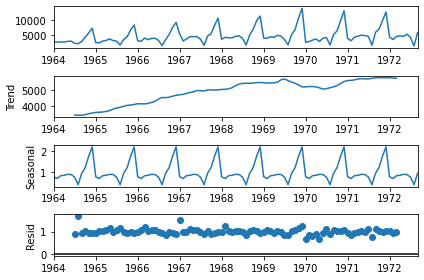

In [9]:
result.plot()
plt.show()

### Nhận xét
* Dữ liệu có xu hướng tăng
* Dữ liệu có xu hướng theo mùa

### 2. Tạo dữ liệu train/test với train chiếm 75% dữ liệu, test chiếm 25% dữ liệu.

In [10]:
train, test = df.iloc[:75, 0], df.iloc[75:, 0]

In [11]:
train[0:5]

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Freq: MS, Name: monthly_champange, dtype: int64

In [12]:
test[0:5]

Month
1970-04-01    3740
1970-05-01    2927
1970-06-01    3986
1970-07-01    4217
1970-08-01    1738
Freq: MS, Name: monthly_champange, dtype: int64

### 3. Áp dụng thuật toán Holt Winters. 

In [13]:
model = ExponentialSmoothing(train, seasonal='mul',
                             seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [14]:
pred = model.predict(start=test.index[0],
                     end=test.index[-1])

In [15]:
mae = mean_absolute_error(test, pred)
mae

1059.0976943977614

In [16]:
mse = mean_squared_error(test, pred)
mse

1601913.2304320307

### 4. Tìm kết quả.

In [17]:
s = datetime.datetime(1972, 10, 1)
e = datetime.datetime(1973, 9, 1)

pred_next_9_month = model.predict(start=s, end=e)
pred_next_9_month

1972-10-01     5573.235812
1972-11-01     8259.895185
1972-12-01    10022.233442
1973-01-01     2912.558001
1973-02-01     3048.635447
1973-03-01     3681.020103
1973-04-01     3610.406965
1973-05-01     4035.689739
1973-06-01     3879.892880
1973-07-01     3064.403682
1973-08-01     1564.895058
1973-09-01     4313.405936
Freq: MS, dtype: float64

In [18]:
x = pd.Series(pred_next_9_month)
type(x)

pandas.core.series.Series

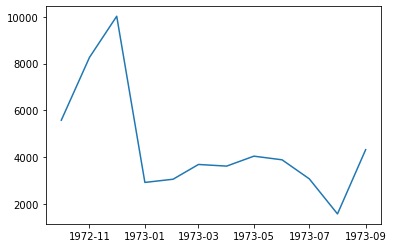

In [19]:
plt.plot(x.index, x.values)

### 5. Trực quan hóa kết quả (trong biểu đồ có cả train, test, predict và next_9_months) 

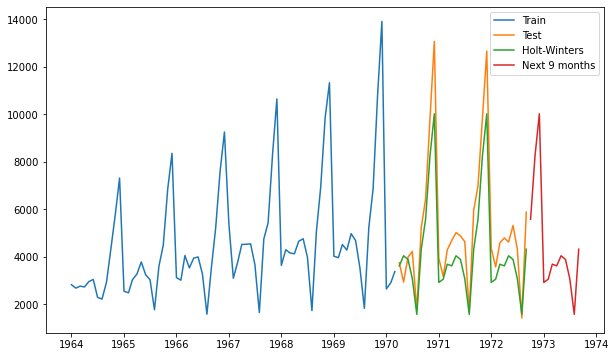

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label="Test")
plt.plot(pred.index, pred, label="Holt-Winters")
plt.plot(x.index, x.values, label="Next 9 months")
plt.legend(loc='best')
plt.show()